# **Manifold of Beta Distribution**

Authors: Sunpeng Duan and Yiliang chen


### Introduction

The differential geometric approach to probability theory and statistics has met increasing interest in theory and applications for the past years. In this approach, probability distributions are seen as elements of a differentiable manifold. And a corresponding metric structure is defined on this kind of mainifold through the choice of a Riemannian metric, such as the Fisher-Rao metric. 


Beta distributions is a family of probability distributions on $[0, 1]$ with density with respect to the Lebesgue measure parameterized by two positive scalars $\alpha, \beta > 0$,
$$p_{\alpha, \beta}(x)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1},\qquad x\in[0,1].$$

### Mathematical definition
Beta manifold is the Riemannian manifold composed of the parameter space $\Theta = \mathbb{R}^∗_+\times\mathbb{R}^∗_+$ and the Fisher metric $g^F$, denoted by the pair $(\mathcal{B},g^F)$, where $\mathcal{B}$ is the family of beta distributions
$$\mathcal{B} = \{\mathcal{B}(\alpha,\beta) = p_{\alpha,\beta}(\cdot)dx, \alpha > 0, \beta > 0\}.$$

Note: Beta manifold is a special case of Dirichlet manifold.

### Real-world Applications
Beta distribution can be used as conjugate prior for several discrete probability distributions in Bayesian inference. Another application of beta distribution is to model percentages and proportions in genomic studies. 

### Visualization

In [1]:
import geomstats.backend as gs
import matplotlib.pyplot as plt
from Beta_Visualization import Beta
from geomstats.information_geometry.beta import BetaDistributions

INFO: Using numpy backend


In [2]:
beta = BetaDistributions()
beta_p = Beta()

#### plot

By definition, the beta manifold is the upper-right quadrant of Euclidean space. Each point on the manifold is a specific beta distribution. 

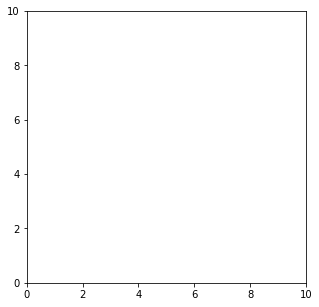

In [3]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.plot(ax,[10,10])

#### Scatter

$\texttt{Input}$: set of points

$\texttt{Output}$: a point cloud

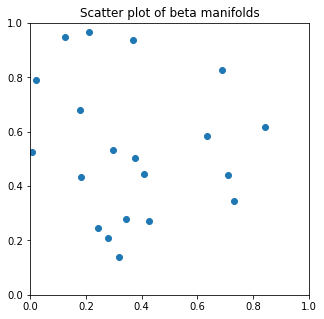

In [4]:
## randomly generate alpha and beta from uniform distribution
points = gs.random.rand(20,2)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.scatter(ax,points)
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
ax.set_title("Scatter plot of beta manifolds");

#### plot_rendering

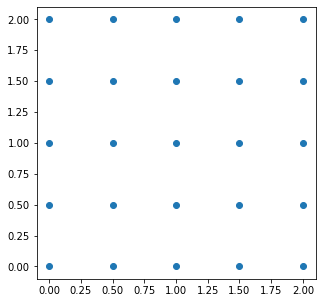

In [5]:
size = [5,5]
sampling_period = 1

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.plot_rendering(ax,size=size,sampling_period=0.5)

#### Plot of Geodesics

$\texttt{Input}$: initial point and end point or initial point and initial tangent vector

$\texttt{Output}$: plot of Geodesics

In the following examples, we give the initial point $(2,3)$ and the end point $(3,2)$, and visualize the Fisher-Rao geodesics.

In [6]:
point_a = gs.array([2.0, 3.0])
point_b = gs.array([3.0, 2.0])

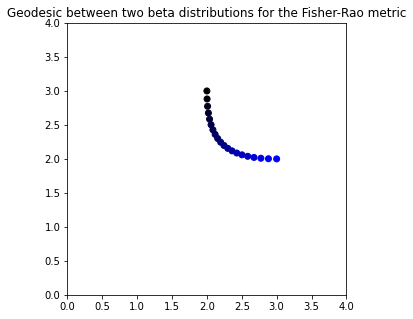

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cc = gs.zeros((20, 3))
cc[:, 2] = gs.linspace(0, 1, 20)

beta_p.plot_geodesic(ax,point_a,point_b,n_points = 20,color=cc)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(0.0, 4.0)
ax.set_title("Geodesic between two beta distributions for the Fisher-Rao metric");

**How to understand the geodesic of the beta manifold?**

Each point of the geodesic defines a beta distribution, and so we obtain an optimal interpolation between the distributions corresponding to point_a and point_b.

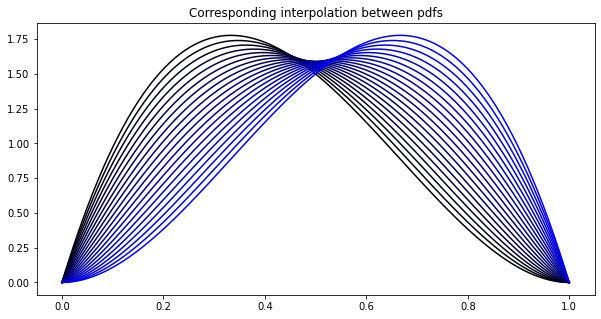

In [8]:
point_a = gs.array([2.0, 3.0])
point_b = gs.array([3.0, 2.0])

n_points = 20
t = gs.linspace(0, 1, n_points)

pdfs = beta.point_to_pdf(beta.metric.geodesic(point_a,point_b)(t))
x = gs.linspace(0.0, 1.0, 100)

fig = plt.figure(figsize=(10, 5))
cc = gs.zeros((n_points, 3))
cc[:, 2] = gs.linspace(0, 1, n_points)
for i in range(n_points):
    plt.plot(x, pdfs(x)[:, i], color=cc[i, :])
plt.title("Corresponding interpolation between pdfs");

#### Plot of Geodesic Ball

$\texttt{Input}$: initial point and a set of tangent vectors.

$\texttt{Output}$: plot of Geodesic ball.

#### plot_grid

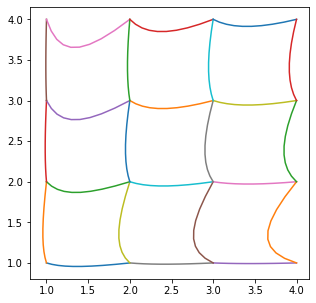

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.plot_grid(ax, initial_point=[1,1],size=[4,4],n_points=10,step=1)

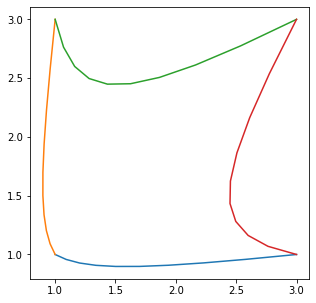

In [10]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.plot_grid(ax, initial_point=[1,1],size=[2,2],n_points=10,step=2)

In [11]:
## initial point: (2,2), which is the center
## initial_vectors: a set of tangent vectors
n_rays = 50
center = gs.array([2.0, 2.0])
theta = gs.linspace(-gs.pi, gs.pi, n_rays)
directions = gs.transpose(gs.stack((gs.cos(theta), gs.sin(theta))))

ray_length = 0.25
direction_norms = beta.metric.squared_norm(directions, center) ** (1 / 2)
unit_vectors = directions / gs.expand_dims(direction_norms, 1)
initial_vectors = ray_length * unit_vectors

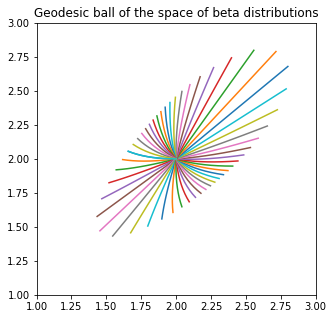

In [12]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.plot_geodestic_ball(ax,center,initial_vectors)
ax.set_xlim(1, 3)
ax.set_ylim(1, 3)
ax.set_title("Geodesic ball of the space of beta distributions");

### Reference

A. Le Brigant and S. Puechmorel, The Fisher-Rao geometry of beta distributions applied to
the study of canonical moments. 2019. <a href="https://hal.archives-ouvertes.fr/hal-02100897" target="_blank">hal-02100897</a>

A. Le Brigant, N. Guigui, S. Rebbah and S. Puechmorel, Classifying histograms of medical data using information geometry of beta distributions. IFAC-PapersOnLine, Vol. 54, No. 9, 514-520, 2021.

Shengping Yang & Zhide Fang (2017) Beta approximation of ratio distribution and its application to next generation sequencing read counts, Journal of Applied Statistics, 44:1,
57-70, DOI: 10.1080/02664763.2016.1158798